# P1W3D4PM - Time Series - Part 2

A time series is a series of data points indexed in time order. Time series resolution is the frequency that data is recorded. For example, heart rate measurements (in units of beats per minute) occur at 0.5 second intervals, so that the length of each series is exactly 15 minutes. Stock data resolution can have different resolution depending on frequency of which data is recorded like: second, minute, hour etc.

Time-series come in all shapes and sizes, but there are a number of very common patterns. They are trend, seasonality, and noise.

- Trend: describes whether the time series is decreasing, constant, or increasing over time.
- Seasonality: describes the periodic signal in your time series.
- Noise: describes what remains behind the separation of seasonality and trend from the time series. In other words, it’s the variability in the data that cannot be explained by the model.

## Trend
Describes whether the time series is decreasing, constant, or increasing over time.

In [1]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 5.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


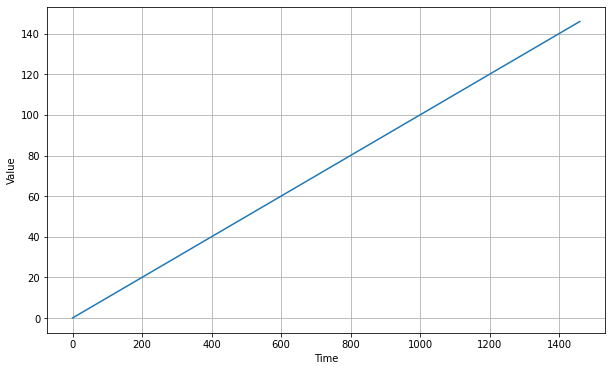

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def trend(time, slope=0):
    return slope * time

def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

time = np.arange(4 * 365 + 1)
baseline = 10
series = trend(time, 0.1)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

## Seasonality
Describes the periodic signal in your time series.

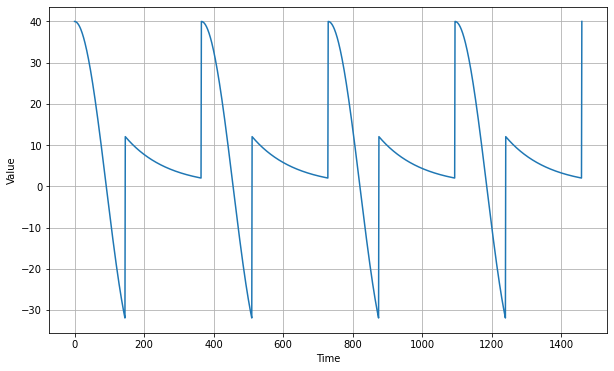

In [3]:
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

baseline = 10
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

Now let's create a time series with both trend and seasonality:

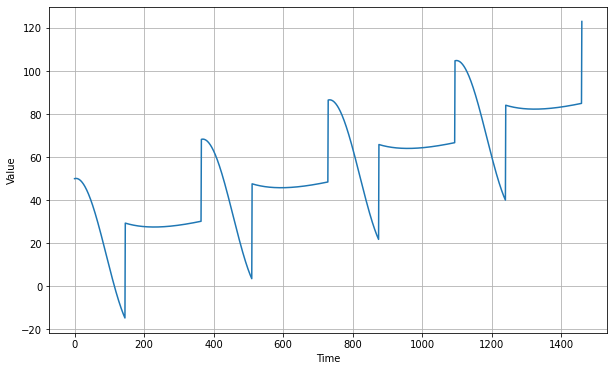

In [4]:
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

## Noise
(Some literatures name it residual or error) Describes what remains behind the separation of seasonality and trend from the time series. In other words, it’s the variability in the data that cannot be explained by the model.

In practice few real-life time series have such a smooth signal. They usually have some noise, and the signal-to-noise ratio can sometimes be very low. Let's generate some white noise:

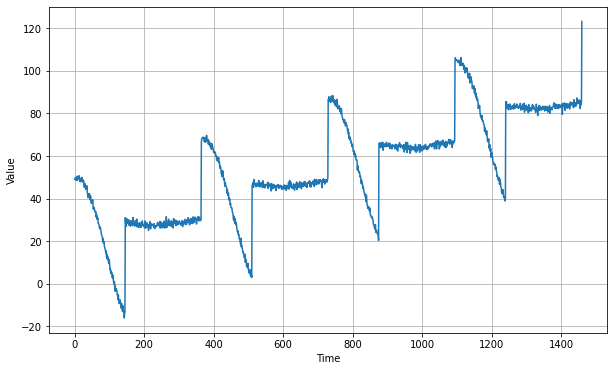

In [5]:
def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

series += noise(time)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

## Time Series Decomposition
In order to analyse the time series data, we have to look at the components or in other word, we decompose the components from the time series. There are two models that describe a time series, which are additive and multiplicative model. A rule of thumb for selecting the right model is to see in our plot if the trend and seasonal variation are relatively constant over time, in other words, linear. If yes, then we will select the Additive model. Otherwise, if the trend and seasonal variation increase or decrease over time then we use the Multiplicative model. Each model has following format:
- Additive: Time Series = Trend + Seasonality + Noise
- Multiplicative: Time Series = Trend * Seasonality * Noise

To do the time series decomposition, fortunately, Python can handle it using seasonal_decompose function in statsmodels.tsa.seasonal

In the cell below, we try to decompose a synthetic data and an airline passengers time series data. The airline data provided on this [link](https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w3/P1W3D4PM%20-%20Time%20Series%20-%20Part%202%20-%20AirPassengersMonthly.csv).

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


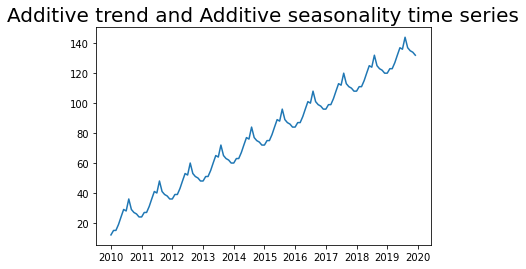

In [6]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_adders = [11, 13, 12, 15, 19, 23, 21, 28, 20, 17, 15, 12]
# Immitate 10 years of data
x_range = np.arange(1, 121)

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Add value to seasonal scalar
        time_series.append(val + seasonal_adders[i])

# Convert to DataFrame
df_syn = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Additive trend and Additive seasonality time series', size=20)
plt.plot(df_syn);

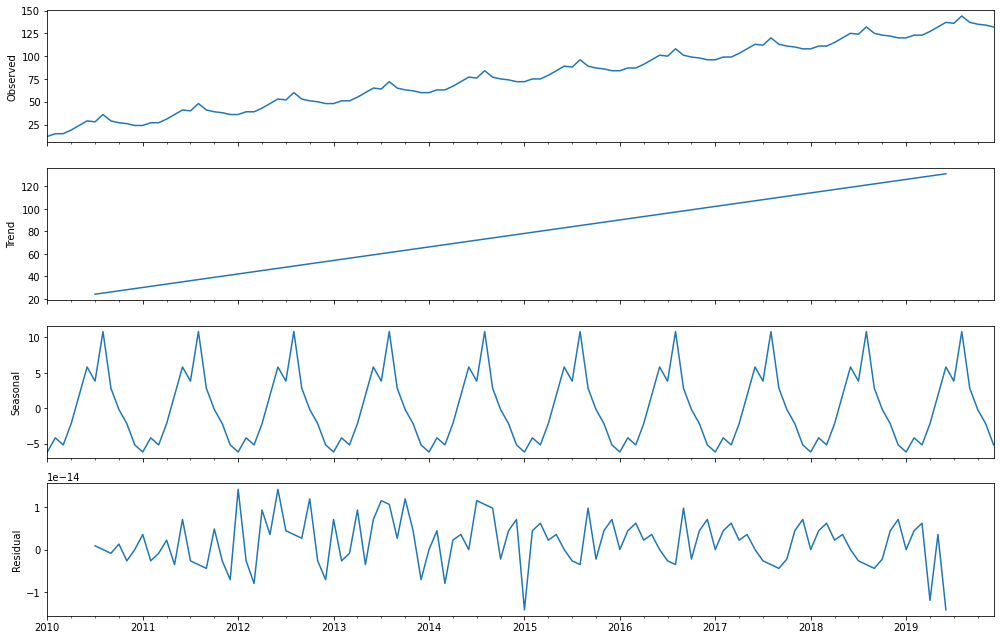

In [7]:
#Start to decompose
import pylab
pylab.rcParams['figure.figsize'] = (14, 9)
#We try to look at the data in yearly period, since the data are in monthly period, we aggregate it into 12 period
res = seasonal_decompose(df_syn,model='additive')
ax=res.plot()
plt.show()

Since the residual range of the time series data is quite small, which is around 1e-14, so the additive model is suitable for the data

### Airline Data

In [8]:
passenger = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w3/P1W3D4PM%20-%20Time%20Series%20-%20Part%202%20-%20AirPassengersMonthly.csv')
passenger

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [9]:
passenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Text(0, 0.5, 'Num of Passengers')

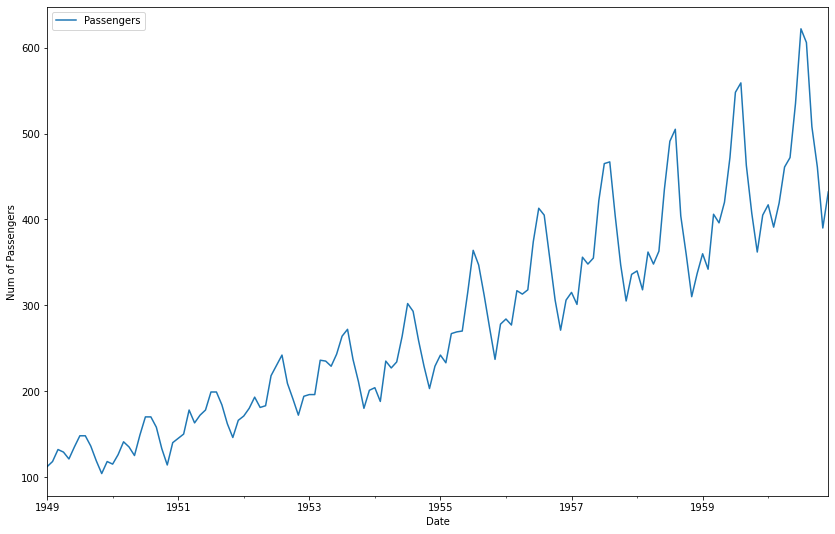

In [10]:
#In order to touch up the table, we change the columns name and also we change dtype of Date into datetime type
passenger.columns=['Date','Passengers']
passenger.Date=pd.to_datetime(passenger.Date)
passenger.set_index('Date',inplace=True)
passenger.plot()
plt.xlabel('Date')
plt.ylabel('Num of Passengers')

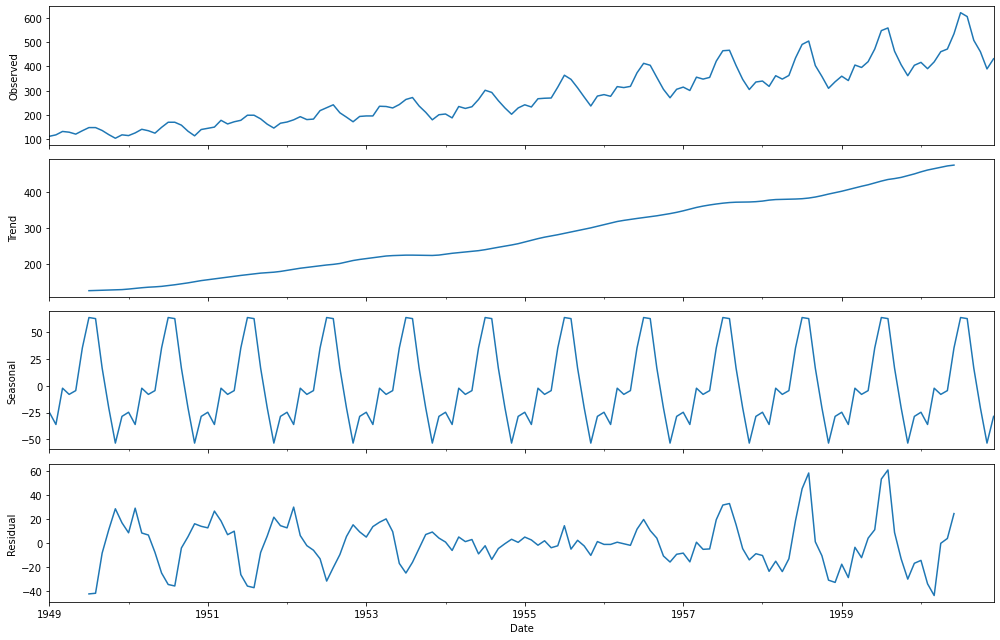

In [11]:
#Start to decompose
import pylab
pylab.rcParams['figure.figsize'] = (14, 9)
#We try to look at the data in yearly period, since the data are in monthly period, we aggregate it into 12 period
res = seasonal_decompose(passenger['Passengers'],model='additive')
ax=res.plot()
plt.show()

According to the decomposition result above, the trend is linear and the seasonal doesn't change over the time, in other words constant. However, the residual is unstable and huge enough. Therefore, this data is not suitable to the additive model and we will perform the multiplicative modelling.

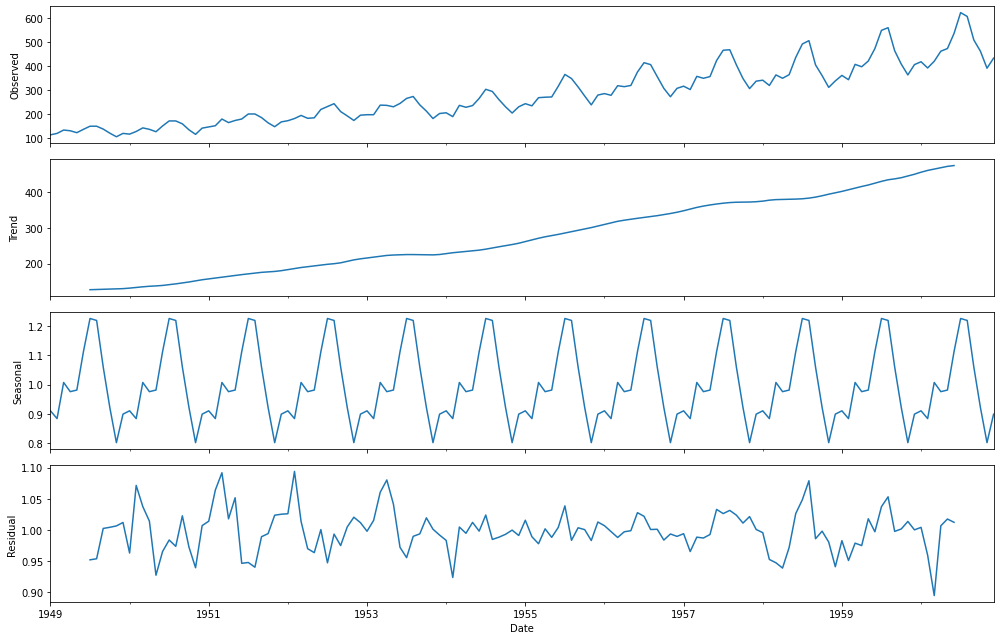

In [12]:
res = seasonal_decompose(passenger['Passengers'],model='multiplicative')
ax=res.plot()
plt.show()

The residual is not huge as the previous one, so the multiplicative data is make sense for this case.

## Forecasting

### Autoregressive Model

An autoregressive (AR) model uses a linear combination of past values of the target to make forecasts. Of course, the regression is made against the target itself. Generally, AR model has following the mathematical expression below:

$$ R_t = \mu +\phi R_{t-1} + \epsilon_t $$

- $\mu $ is mean
- $ \phi$ is a fraction which the value lies between -1 to 1 
- $ R_{t-1}$ is the prior's/yesterday's value
- $ \epsilon_t$ is noise

The equation above is the 1-order autoregressive model or AR(1). You can model the data using the high order models or adding more lags. The mathematical equation could be:
- $AR(2): R_t=\mu + \phi_1 R_{t-1} + \phi_2 R_{t-2} +\epsilon_t$
- $AR(3): R_t=\mu + \phi_1 R_{t-1} + \phi_2 R_{t-2} + \phi_3 R_{t-3} +\epsilon_t$
- ... so on

To forecast a time series data using AR model, we can use an ARMA class which provided in statsmodels.tsa.arima_model. Note that ARMA model involves autoregressive and moving average. To set that only AR model you use, you can set the order arguments, order=(AR_order,MA_order). For AR(1) we can state the arguments to order=(1,0), AR(2) to order=(2,0), and so on.

-----------
Warning from statsmodels dev:

statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

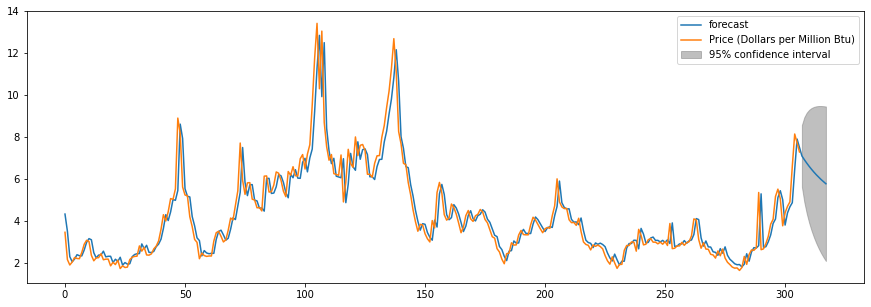

In [13]:
# Ignoring ARMA warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt


nat_gas=pd.read_excel('https://www.eia.gov/dnav/ng/hist_xls/RNGWHHDm.xls',sheet_name='Data 1',header=2)
nat_gas.columns=['Date','Price (Dollars per Million Btu)']
nat_gas.Date=pd.to_datetime(nat_gas.Date)
nat_gas.set_index('Date',inplace=True)


# Forecast the first MA(1) model
mod = ARMA(nat_gas, order=(1,0)) #set MA_order to 1 for AR(1) model, another is 0
res = mod.fit()
fig,ax=plt.subplots(figsize=(15,5))
res.plot_predict(start=0, end=len(nat_gas)+10,ax=ax)
plt.show()


### Moving Average

A moving average (MA) model computes the average of different subset of the time series data. Generally, MA model has following the mathematical expression below:

$$ R_t = \mu + \epsilon_t + \theta \epsilon_{t-1}$$

- $\mu $ is mean
- $ \epsilon_t$ is noise
- $ \theta$ is a fraction theta of yesterday's noise


The equation above is the 1-order moving average model or MA(1). The higher order formats are the same as AR model.

To forecast a time series data using MA model, we can use the same class as AR but only set AR_order to 0 and MA_order greater than 0. For MA(1) we can state the arguments to order=(0,1), MA(2) to order=(0,2), and so on.

-----------
Warning from statsmodels dev:

statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

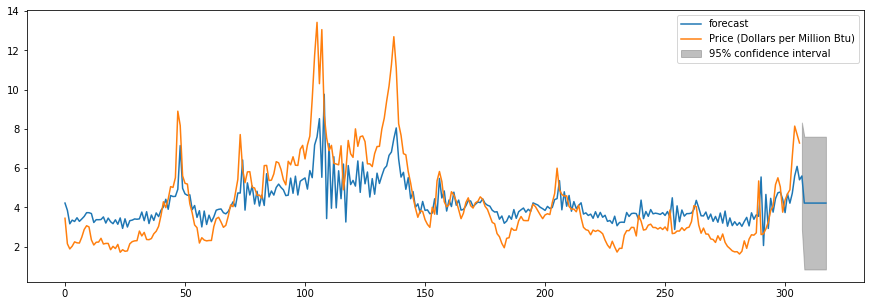

In [14]:
# Ignoring ARMA warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt


nat_gas=pd.read_excel('https://www.eia.gov/dnav/ng/hist_xls/RNGWHHDm.xls',sheet_name='Data 1',header=2)
nat_gas.columns=['Date','Price (Dollars per Million Btu)']
nat_gas.Date=pd.to_datetime(nat_gas.Date)
nat_gas.set_index('Date',inplace=True)


# Forecast the first MA(1) model
mod = ARMA(nat_gas, order=(0,1)) #set MA_order to 1 for MA(1) model, another is 0
res = mod.fit()
fig,ax=plt.subplots(figsize=(15,5))
res.plot_predict(start=0, end=len(nat_gas)+10,ax=ax)
plt.show()

### Autoregressive Moving Average (ARMA)

ARMA is a combination between autoregressive and moving average model. We use the same class as AR or MA to forecast a time series data using ARMA model. Since it is a combination of two models, we need to set the values of AR_order and MA_order (Usually in other references they symbolized by p and q respectively) in the order argument. To do the forecast the previous data (natural gas), let's look at the code below.

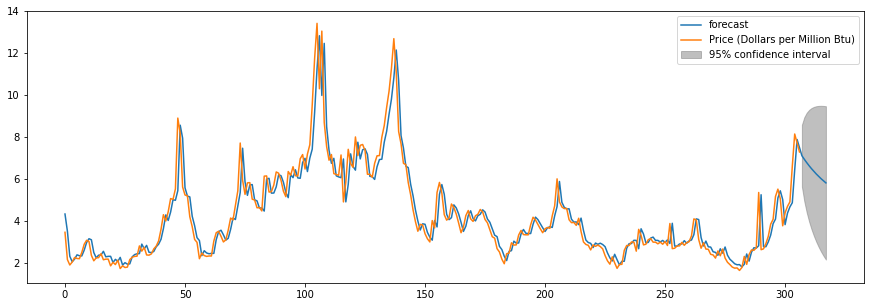

In [15]:
# Ignoring ARMA warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt


nat_gas=pd.read_excel('https://www.eia.gov/dnav/ng/hist_xls/RNGWHHDm.xls',sheet_name='Data 1',header=2)
nat_gas.columns=['Date','Price (Dollars per Million Btu)']
nat_gas.Date=pd.to_datetime(nat_gas.Date)
nat_gas.set_index('Date',inplace=True)


# Forecast the first MA(1) model
mod = ARMA(nat_gas, order=(1,1)) #set MA_order to 1 for MA(1) model, another is 0
res = mod.fit()
fig,ax=plt.subplots(figsize=(15,5))
res.plot_predict(start=0, end=len(nat_gas)+10,ax=ax)
plt.show()

The forecasts above may not look very impressive, as it is almost a straight line. This is because this is a very simple, univariate forecasting model. Nonetheless, keep in mind that these simple forecasting models can be extremely competitive.

### Choosing the Right Model

The result of ARMA and AR may almost fit into the natural gas data. It didn't show on MA model. The question are how do we determine which best model to fit our data? and then what order we should use?. Moreover, we need to test our model using Akaike's Information Criterion (AIC). Mathematically, AIC can be written by:
$$ AIC=-2\log{L}+2k $$
- L is the likelihood of the data
- k s the number of parameters with formula: k=p+q+1, for AR(1), p=1,q=0 and for MA(1), p=0,q=1

simply, we want to select a model with the lowest AIC value compared to other models. To measure the AIC value of the model, we only calling the .aic attribute following the fitting result after we fit the data with the model. To understand how to do that in Python, let's check the code below.

In [16]:
# Ignoring ARMA warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from statsmodels.tsa.arima_model import ARMA


nat_gas=pd.read_excel('https://www.eia.gov/dnav/ng/hist_xls/RNGWHHDm.xls',sheet_name='Data 1',header=2)
nat_gas.columns=['Date','Price (Dollars per Million Btu)']
nat_gas.Date=pd.to_datetime(nat_gas.Date)
nat_gas.set_index('Date',inplace=True)

mod = ARMA(nat_gas, order=(1,1)) #set MA_order to 1 for MA(1) model, another is 0
res=mod.fit()

print('The AIC is',res.aic)

The AIC is 707.0413554214073


The aim to find the best model that has the lowest aic, we need to comparing a model to others, so we need build some script to perform our need that is to find which model that has the lowest aic. In the cell below, we will include AR,MA, and ARMA models. We just set the (p,q) value. In the example below we set arrays of p and q of integer number 0-5.

In [17]:
def find_best_model(data,num_p,num_q):
    df=pd.DataFrame() #We make a pandas dataframe to ease our work, you can use any way that makes you comfortable and work easly
    pq=[[],[]] #This list for storing the combinations of p and q
    aic=[] # This list for storing aic value
    for p in range(num_p+1): #plus one is to make the range up to num_p since python range only ranging from 0 to N-1
        for q in range(num_q+1):
            if p!=0 and q!=0: #this logic will avoid (0,0) value which is not correct
                try: #Using exception to avoid the error while training the model with certain p and q value
                    model=ARMA(data,order=(p,q))
                    result=model.fit()
                    pq[0].append(p)
                    pq[1].append(q)
                    aic.append(result.aic)
                except:
                    pass #If there is an error caused by the calculation, it will be skipped to the next iteration
    df['p']=pq[0]
    df['q']=pq[1]
    df['AIC']=aic
    
    df.sort_values('AIC',inplace=True)
    
    return df.p.iloc[0],df.q.iloc[0],df.AIC.iloc[0],df

In [18]:
# Ignoring ARMA warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from statsmodels.tsa.arima_model import ARMA


nat_gas=pd.read_excel('https://www.eia.gov/dnav/ng/hist_xls/RNGWHHDm.xls',sheet_name='Data 1',header=2)
nat_gas.columns=['Date','Price (Dollars per Million Btu)']
nat_gas.Date=pd.to_datetime(nat_gas.Date)
nat_gas.set_index('Date',inplace=True)

p,q,AIC,df=find_best_model(nat_gas,5,5)

print('The best model is that has p={} and q={} with AIC={}'.format(p,q,AIC))

The best model is that has p=5 and q=3 with AIC=701.1288189207843


The best model for fitting our data that has the lowest AIC is ARMA(4,4)